In [11]:
import pandas as pd
import numpy as np
import re
!pip install wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import html
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve
from pandas.testing import assert_frame_equal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## 1. Data Cleaning

Objectives: to load data, view data, and clean data

1- All html tags and attributes (i.e., /<[^>]+>/) are removed.
 
 2-Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
 
 3-All URLs are removed.All characters in the text are in lowercase.A
 
 4-ll stopwords are removed. Be clear in what you consider as a stopword.
 
 5-If a tweet is empty after pre-processing, it should be preserved as such.

In [12]:
# first we load the data into pandas dataframe

tweets=pd.read_csv("generic_tweets.csv")

In [13]:
## take a look at generic_tweet_df
tweets.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
# more info on twwets data frame
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
class    200000 non-null int64
id       200000 non-null int64
date     200000 non-null object
query    200000 non-null object
user     200000 non-null object
text     200000 non-null object
dtypes: int64(2), object(4)
memory usage: 9.2+ MB


In [15]:
stopwords=pd.read_csv("stop_words.csv")["a"].tolist()

In [16]:
# i defined a data cleaning function to take string as input and yield a cleaned output as required
def data_clean(text):
    #stop words taken from list as defined in assignment instructions
    stop_words = stopwords
    
    # uses regular expression to remove html tags
    cleaner = re.compile('<.*?>')
    text = re.sub(cleaner, '', text) 
        
    # to replace html character codes
    html_decoded_string = html.unescape(text)
    text = html_decoded_string
        
    # uses regular expression to remove urls
    text = re.sub('(\s+\S+.[^\s]+/\S+)','',text)
        
    # turn text into lower case
    text = text.lower()
        
    # removes punctuation and white space, here we tokenize the string, turing it into a list of words
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
        
    # removes stopwords, and return a joined string
    cleaned_text = filter(lambda x: x not in stop_words, text)
    text = cleaned_text
    text = " ".join(text)
    return text

In [17]:
tweets.shape
data_clean(tweets.loc[0,"text"])

'switchfoot awww a bummer shoulda david carr third day'

In [18]:
#cleaning the whole text column by calling the text function
tweets["text"]=tweets["text"].apply(lambda x: data_clean(str(x)))

In [19]:
tweets[["text"]].head()

,text
0,switchfoot awww a bummer shoulda david carr th...
1,upset t update facebook texting cry a result s...
2,kenichan dived times ball managed save 50 rest...
3,body feels itchy fire
4,nationwideclass behaving mad t


In [20]:
tweets=tweets[["class","text"]]

In [21]:
tweets.head()

,class,text
0,0,switchfoot awww a bummer shoulda david carr th...
1,0,upset t update facebook texting cry a result s...
2,0,kenichan dived times ball managed save 50 rest...
3,0,body feels itchy fire
4,0,nationwideclass behaving mad t


## 2. Exploratory Data Analysis

Designed a simple procedure that determines the political party (Liberal, Conservative,
NDP, None) of a given tweet and visualized the outcome using Word Cloud and Bar plot.

In [22]:
canadian=pd.read_csv("Canadian_elections_2019.csv")

In [23]:
canadian.head()

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."


In [24]:
for i in range(canadian.shape[0]):
    canadian.loc[i,"text"]=data_clean(str(canadian.loc[i,"text"]))

In [25]:
for i in range(10):
    print(canadian.loc[i,"text"])
    print("/n")

rosiebarton suggestion agree canadian women trust andrewscheer a conservatives government will protect a woman automony body cdnpoli elxn43 canada abortion
/n
allwomanspacewalk real space_station etobicokenorth cityofto onpoli cdnpoli
/n
brantford going cost 94 billion 4 years justin elxn43 cdnpoli
/n
canada canadaelection2019 canadavotes elxn43 ncan t decide
/n
canada taxpayers sick tired hard earned donated corporate welfare bums don t reasons trudeaumustgo snclavalin leave canada care sheila_copps snclavalinscandal election2019 elxn43
/n
canadavotes2019 elxn43 cdnpoli facts blastfromthepast 2012 conservatives introduced long gun registry heads police canada victims groups objected crime control public safety gunlobby
/n
cdnmedia elxn43 cdnpoli ppc rocky dong hands best election video google rocky dong boxes socialism haven t
/n
cdnpoli elxn43 liberals double promised 2015 national debt term elected forecasting 90 billion a national pharmacare program incl ndp coalition 180 billion i

In [26]:
# then i created list of all tweets
tweet_list=[]
for i in range(canadian.shape[0]):
    tweet_list.append(canadian.loc[i,"text"])

In [27]:
tweet_list

['rosiebarton suggestion agree canadian women trust andrewscheer a conservatives government will protect a woman automony body cdnpoli elxn43 canada abortion',
 'allwomanspacewalk real space_station etobicokenorth cityofto onpoli cdnpoli',
 'brantford going cost 94 billion 4 years justin elxn43 cdnpoli',
 'canada canadaelection2019 canadavotes elxn43 ncan t decide',
 'canada taxpayers sick tired hard earned donated corporate welfare bums don t reasons trudeaumustgo snclavalin leave canada care sheila_copps snclavalinscandal election2019 elxn43',
 'canadavotes2019 elxn43 cdnpoli facts blastfromthepast 2012 conservatives introduced long gun registry heads police canada victims groups objected crime control public safety gunlobby',
 'cdnmedia elxn43 cdnpoli ppc rocky dong hands best election video google rocky dong boxes socialism haven t',
 'cdnpoli elxn43 liberals double promised 2015 national debt term elected forecasting 90 billion a national pharmacare program incl ndp coalition 180 

 A simple procedure that determines the political party (Liberal, Conservative,
NDP, None) of a given tweet and apply this procedure to all the tweets in the 2019
Canadian elections dataset

In [28]:
for index,tweet in enumerate(tweet_list):
    print(index,tweet)

0 rosiebarton suggestion agree canadian women trust andrewscheer a conservatives government will protect a woman automony body cdnpoli elxn43 canada abortion
1 allwomanspacewalk real space_station etobicokenorth cityofto onpoli cdnpoli
2 brantford going cost 94 billion 4 years justin elxn43 cdnpoli
3 canada canadaelection2019 canadavotes elxn43 ncan t decide
4 canada taxpayers sick tired hard earned donated corporate welfare bums don t reasons trudeaumustgo snclavalin leave canada care sheila_copps snclavalinscandal election2019 elxn43
5 canadavotes2019 elxn43 cdnpoli facts blastfromthepast 2012 conservatives introduced long gun registry heads police canada victims groups objected crime control public safety gunlobby
6 cdnmedia elxn43 cdnpoli ppc rocky dong hands best election video google rocky dong boxes socialism haven t
7 cdnpoli elxn43 liberals double promised 2015 national debt term elected forecasting 90 billion a national pharmacare program incl ndp coalition 180 billion imo
8 

941 niknanos daylight emerging liberals favour ntrudeau confidently barnstorming conservative held ridings ontario nscheer flailing a drowning man nturn lights good elxn43 canadavotes2019 liberalgovernment
942 nspector4 ajwvictoriabc misinformation simply mistaken disinformation soviet dezinformatsiya intentionally intended mislead elxn43 ndp canadiangreens
943 officialmlk3 justintrudeau liberal_party mlk iii canada elxn43 cdnpoli chooseforward
944 oracle_bill cpc_hq gpc collusion greens cpc legal elxn43 electionscan_e
945 ottawaccarol carol fake liberals don xe2 x80 x99t care real pollution sewage flowing ottawa river xe2 x80 x99re xe2 x80 x98important xe2 x80 x99 things plastic straws votecarol ottawacentre elxn43 trudeaumustgo
946 ottawacitizen don xe2 x80 x99t
947 ottawacitizen endorsement cancelling subscription nand nanyone pecker board xe2 x80 x9cjournalists xe2 x80 x9d lilley nand supporting lyin xe2 x80 x99 andy xf0 x9f x87 xba xf0 x9f x87 xb8 doesn xe2 x80 x99t help cdnpoli e

1171 amazing team today doorknocking sowk elxn43
1172 american perspective chameleon scandals missed mark norman snc lavelin deferred kicking strong female mps aga khan island vacation qcpoli polqc polcan caq plc montreal polmtl eletion2019 elxn43 mtl
1173 overwhelming positive response doorknocking etobicoke centre yvan_baker great joined donna cansfield 27 years politics forward yvan_baker mp 4 etobicoke centre justintrudeau cdnpoli elxn43
1174 times justin trudeau asked will pay newly announced platform 20 billion national pharmacare plan don xe2 x80 x99t a good smear discussing actual policy cost taxpayers elxn43
1175 question peoplespca hard frame immigration policy properly sustainable immigration sensible explaining current numbers stress social services immigrants supported ffs elxn43
1176 xe2 x80 x99s big engagedcitizens initforyou elxn43 ndp jagmeetsingh calgary
1177 group election day gotv volunteers minsooklee ready turn toronto danforth ndp orange election day elxn43 cdnpo

1814 andy good bang buck
1815 consider elxn43
1816 sooo close cdnpoli
1817 lraitt good miltonon a great guy vankayak hell vote cancer sexy comment pretty stupid insurance secretary lose monday buhbyelisa
1818 sound friends elxn43
1819 statement 2019 canadian federal forest cdnpoli elxn43 environment youth4climate climatecrisis
1820 stay lighthearted election horrible ncuddle pandas don xe2 x80 x99t accuse people hating trudeau don xe2 x80 x99t chooseforward
1821 feel undecided uninformed vote days canadians cast ballots monday check major parties xe2 x80 x99 platforms monday elxn43 canadaelection2019
1822 force hardest working team guelph elxn43
1823 click bait questions shit canadians care
1824 studying sports weekend ni xe2 x80 x99ll live liberal minister jim carr xe2 x80 x99s campaign hq reporting ctvnationalnews elxn43
1825 stumble bum scheer finer moments fumblefrack elxn43
1826 sun scribe kinsella hired bernier conservatives cdnpoli cdnmedia
1827 super saturday underway vangran t

2045 federal election candidates beaches east york toronto danforth affordable housing cdnpoli elxn43
2046 leaders xe2 x80 x99 debates feedback debates better elxn43 canadadebates2019
2047 voting nconservative nliberal nblanchist nwhat normal citizen nanswer nto normal citizen vote ndp polqc polcan elxn43
2048 jordycarr1 leader rolling mud kinsellawarren kind government expect andrew scheer elxn43 cdnpoli northbaynip northbaytoday kissnorthbay northbaynugget temspeaker themoose1063
2049 candidate stand ni stand canada xf0 x9f x87 xa8 xf0 x9f x87 xa6 xe2 x9c x94 xef xb8 x8fvote canada elxn43 cdnpoli
2050 american andrew scheer disqualified pm race cpc investigated cdnpoli elxn43
2051 ridings watching elxn43 xc2 xa0 interest mine karenmccrimmon kanatacarleton xf0 x9f x91 x8d dondavies vancouvernorth xf0 x9f x91 x8d mpmarilyngladu sarnialambton xf0 x9f x91 x8d vankayak milton xf0 x9f x91 x8d nirmalanaidoo yycskyview xf0 x9f x91 x8d
2052 political party pledges metro displays lionel groulx

In [29]:
def assign_party(tw_list):
    '''
    The function take takes a single tweet as imput and analyze the keyword in it. 
    It compares the word frequency of each tweet in the key word list for each party.
    The output is the politican party name of the single twitter. 
    If a tweet is identified as more than one party attribute, it choose the most common party names.
    '''
    tw = tw_list
    # keywords of each party
    liberal =['trudeau', "justin", "justintrudeau", "liberal","liberals","realchange","red","teamtrudeau","lpc","real change"] #defining parties
    conservative=["harper", "steven", "conservative","stiven","blue", "conservatives","cpc"]
    NDP=["ndp","orange","quebec","tommulcair","mulcair","ptndp","ready4change"]
    other = ["green","freedom"]
    # we only defined words in lowercase format, since all words in tweet line are converted to lowercase
    a = []
        
    for word in liberal:   
        if word in tw:
            a.append('Liberal')
        
    for word in conservative:
        if word in tw:
            a.append('Conservative')
           
    for word in NDP:
        if word in tw:
            a.append('NDP')
            
    for word in other:
        if word in tw:
            a.append('Other')
    # choose the most common party name for this tweet
    if len(a) > 1:
        most_common = max(set(a), key=a.count)
        a = []
        a.append(most_common)
    elif len(a) == 0:
        a.append('Other')
        
    return a

In [30]:
partylist=[]
for i in range(2133):
    partylist.append(assign_party(tweet_list[i])[0])

In [31]:
partylist

['Conservative',
 'Other',
 'Liberal',
 'Other',
 'Liberal',
 'Conservative',
 'Other',
 'Liberal',
 'Other',
 'Liberal',
 'Other',
 'Liberal',
 'Other',
 'Other',
 'Liberal',
 'Other',
 'Other',
 'Other',
 'Other',
 'Conservative',
 'Liberal',
 'Other',
 'Other',
 'Liberal',
 'Liberal',
 'Other',
 'Liberal',
 'Liberal',
 'Liberal',
 'Other',
 'Liberal',
 'Other',
 'Conservative',
 'Liberal',
 'Other',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Conservative',
 'Liberal',
 'Liberal',
 'Other',
 'Other',
 'Other',
 'Liberal',
 'Conservative',
 'Other',
 'Other',
 'Liberal',
 'Other',
 'Liberal',
 'Other',
 'Other',
 'Liberal',
 'Liberal',
 'Liberal',
 'Other',
 'Other',
 'Conservative',
 'Conservative',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Liberal',
 'Liberal',
 'Liberal',
 'Other',
 'Other',
 'NDP',
 'Other',
 'Other',
 'Other',
 'Liberal',
 'Other',
 'Liberal',
 'Liberal',
 'Other',
 'Other',
 'Other',
 'Liberal',
 'Conservative',
 'Liberal',
 'Liberal',
 'Liberal

In [32]:
canadian["party names"]=partylist

In [63]:
canadian["party names"].value_counts()

Other           1125
Liberal          511
Conservative     374
NDP              123
Name: party names, dtype: int64

In [64]:
conservatives=374


In [68]:
liberals=511

In [69]:
NDP=96

In [70]:
Others=1125

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

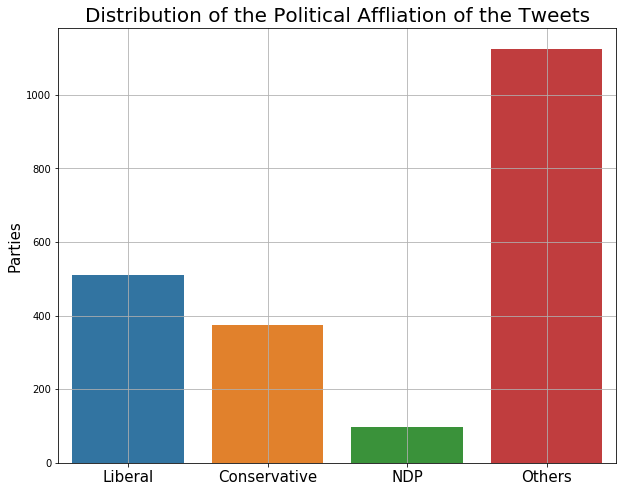

In [71]:
x=["Liberal","Conservative","NDP","Others"]
y=[liberals,conservatives,NDP,Others]
import seaborn as sb
plt.figure(figsize=(10,8))
sb.barplot(x,y)
plt.ylabel('Parties',size=15)

plt.title('Distribution of the Political Affliation of the Tweets',size=20)
plt.grid()
plt.xticks(size=15)

The distribution results of unclassified tweets demonstrate that most of tweets are identified as other since they don't contain any of the keyword in the list. Number of tweets about Liberal are highest (538) followed by  Conservative (374).


In [72]:
canadian.head(20)

,sentiment,negative_reason,text,party names
0,0,Women Reproductive right and Racism,rosiebarton suggestion agree canadian women tr...,Conservative
1,4,NaN,allwomanspacewalk real space_station etobicoke...,Other
2,0,Economy,brantford going cost 94 billion 4 years justin...,Liberal
3,4,NaN,canada canadaelection2019 canadavotes elxn43 n...,Other
4,0,Economy,canada taxpayers sick tired hard earned donate...,Liberal
5,0,Others,canadavotes2019 elxn43 cdnpoli facts blastfrom...,Conservative
6,4,NaN,cdnmedia elxn43 cdnpoli ppc rocky dong hands b...,Other
7,4,NaN,cdnpoli elxn43 liberals double promised 2015 n...,Liberal
8,0,Others,chooseforward cdnpoli elxn43 ncanada don t ame...,Other
9,0,Scandal,cpckinsellagate nlet receipts pays warren kins...,Conservative


Combining all the tweets related to different political affilitions in different lists

In [73]:
## Combining all other tweets for other parties
others=canadian[canadian["party names"]== "Other"]
other_tweets=others["text"].tolist()
others.head()

,sentiment,negative_reason,text,party names
1,4,NaN,allwomanspacewalk real space_station etobicoke...,Other
3,4,NaN,canada canadaelection2019 canadavotes elxn43 n...,Other
6,4,NaN,cdnmedia elxn43 cdnpoli ppc rocky dong hands b...,Other
8,0,Others,chooseforward cdnpoli elxn43 ncanada don t ame...,Other
10,4,NaN,elxn43 days voting day read primer learn vote ...,Other


In [74]:
## Combining all other tweets for conservative parties
conservative=canadian[canadian["party names"]== "Conservative"]
conservative_tweets=conservative["text"].tolist()
conservative.head()

,sentiment,negative_reason,text,party names
0,0,Women Reproductive right and Racism,rosiebarton suggestion agree canadian women tr...,Conservative
5,0,Others,canadavotes2019 elxn43 cdnpoli facts blastfrom...,Conservative
9,0,Scandal,cpckinsellagate nlet receipts pays warren kins...,Conservative
14,0,Others,kinsella runs deep cpc lyingandy a crazed anti...,Conservative
19,0,Scandal,urgent watch video david haskell people party ...,Conservative


In [75]:
## Combining all other tweets for liberal parties
liberal=canadian[canadian["party names"]== "Liberal"]
liberal_tweets=conservative["text"].tolist()
liberal.head()

,sentiment,negative_reason,text,party names
2,0,Economy,brantford going cost 94 billion 4 years justin...,Liberal
4,0,Economy,canada taxpayers sick tired hard earned donate...,Liberal
7,4,NaN,cdnpoli elxn43 liberals double promised 2015 n...,Liberal
11,4,NaN,elxn43 prediction justin trudeau lpc loses mon...,Liberal
20,0,Others,policy comment illegal immoral nefarious activ...,Liberal


In [76]:
## Combining all other tweets for NDP parties
ndp=canadian[canadian["party names"]== "NDP"]
ndp_tweets=ndp["text"].tolist()
ndp.head()

,sentiment,negative_reason,text,party names
71,4,NaN,emilietaman ndp spicy nlet emilietaman thejagm...,NDP
94,0,Tell lies,johnpeate5 a fact jagmeetsingh contradicting d...,NDP
100,4,NaN,kady transparent write a letter share publicly...,NDP
173,0,Economy,thejagmeetsingh admitting will destroy canada ...,NDP
177,0,Women Reproductive right and Racism,truenorthcentre kellieleitch ameen trudeau sup...,NDP


In [77]:

def split_tweets(tweets):
    wordslist=[]
    for tweet in tweets:
        wordslist.append(tweet.split())
    new_list=[]
    for list in wordslist:
        new_list=new_list+list
    text=" ".join(new_list)
    return text   

### Word Cloud for Liberals

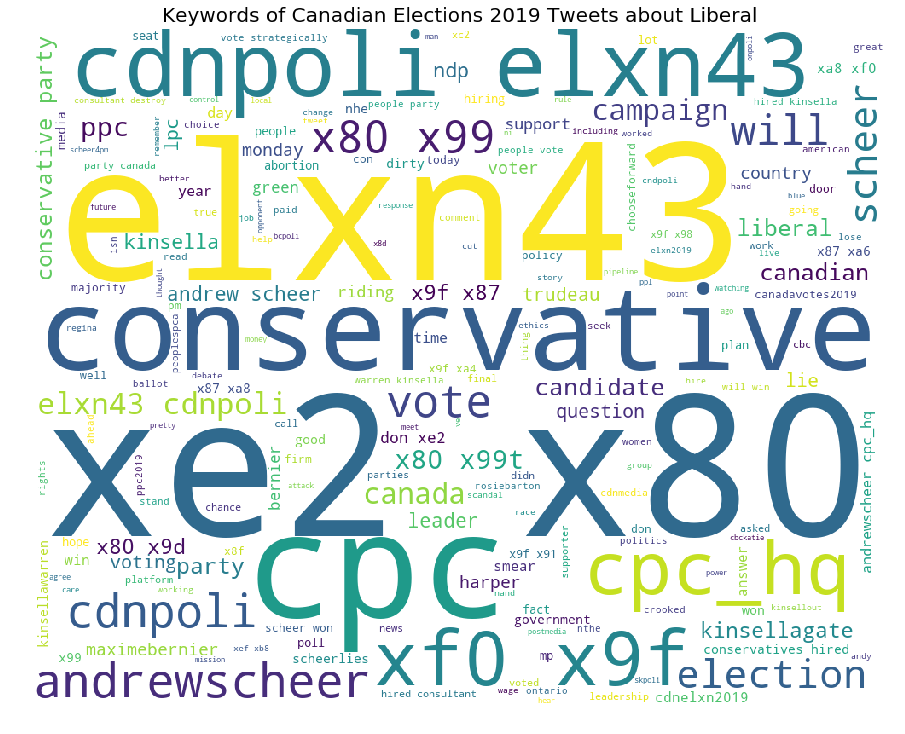

In [79]:
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white',  
                min_font_size = 5).generate(split_tweets(liberal_tweets))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Keywords of Canadian Elections 2019 Tweets about Liberal',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

## Bonus- 

### While the exploratory analysis section requires only two figures, you can explore the data further.

### Word Cloud for Conservatives

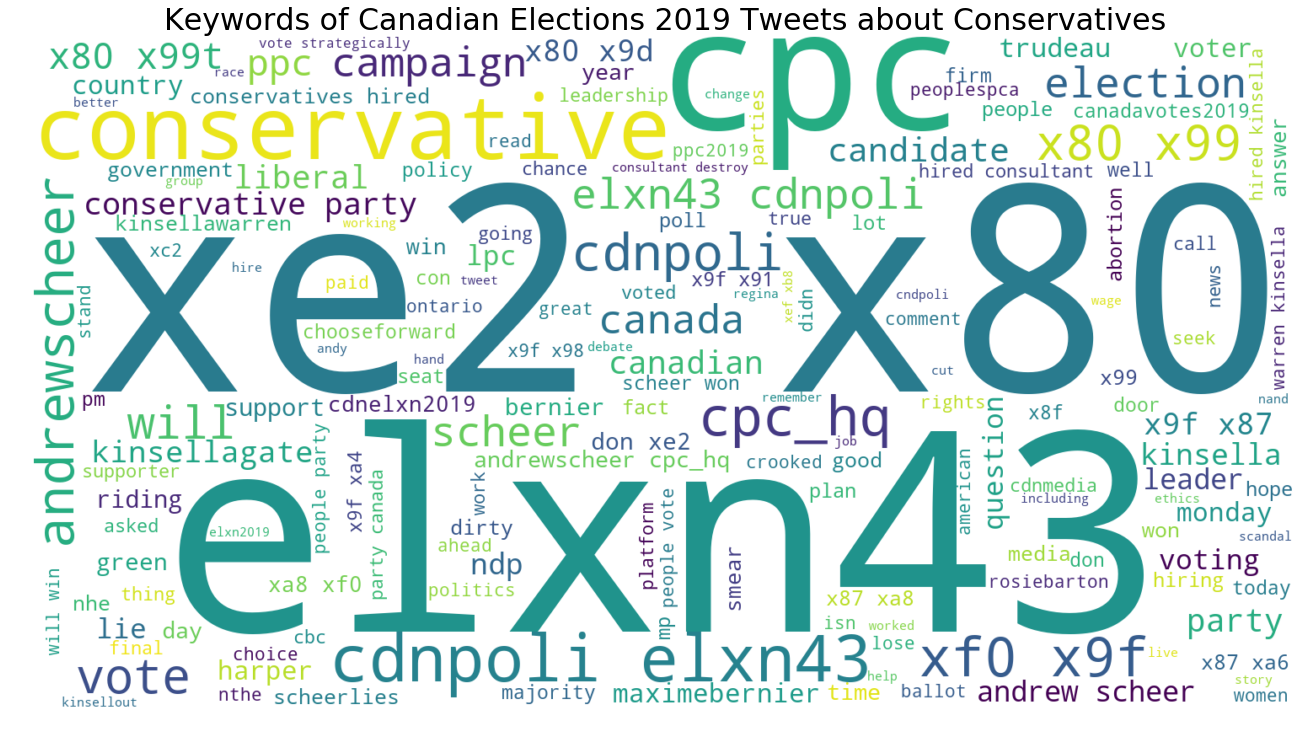

In [38]:
wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='white',  
                min_font_size = 15).generate(split_tweets(conservative_tweets))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords of Canadian Elections 2019 Tweets about Conservatives',size=30)
plt.axis("off")
plt.tight_layout(pad = 0) 
  
plt.show()

### Word Cloud for NDP

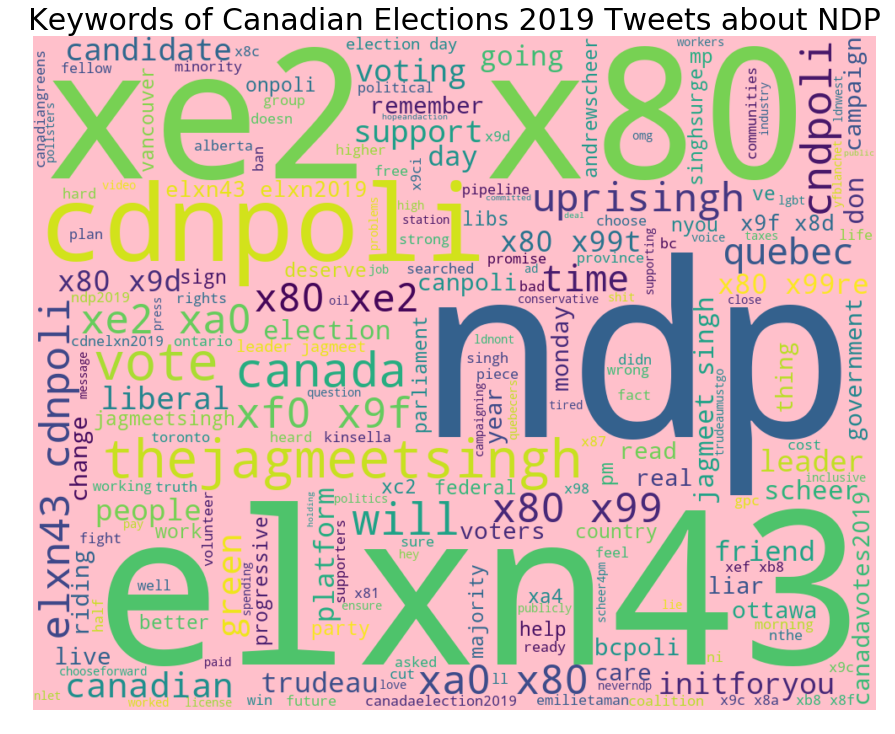

In [40]:
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='pink',  
                min_font_size = 10).generate(split_tweets(ndp_tweets))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords of Canadian Elections 2019 Tweets about NDP',size=30)
plt.axis("off")
plt.tight_layout(pad = 0) 
  
plt.show()

### Word Cloud for Others

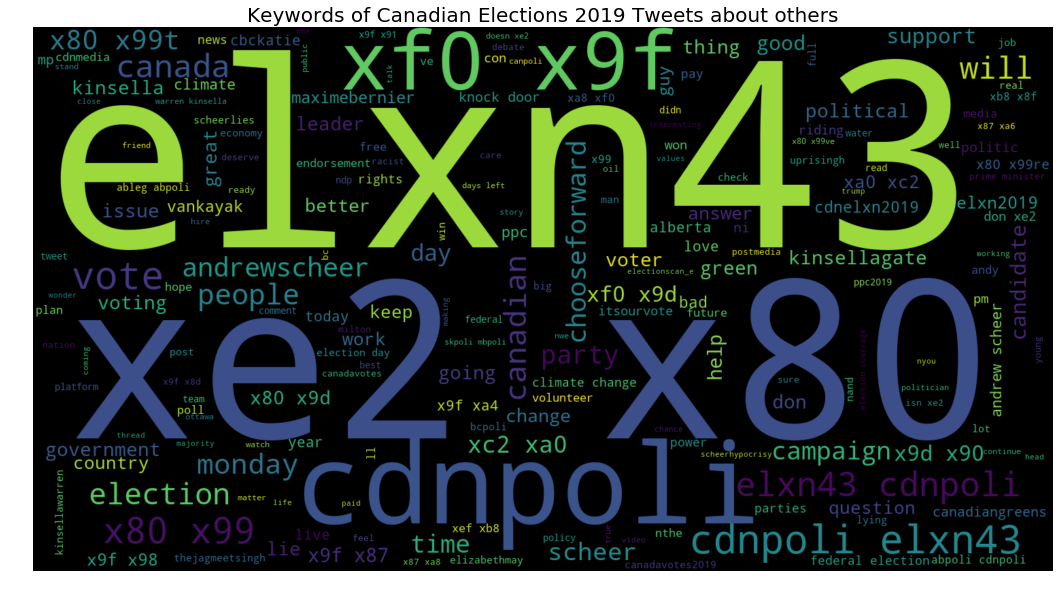

In [80]:
wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black',  
                min_font_size = 10).generate(split_tweets(other_tweets))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords of Canadian Elections 2019 Tweets about others',size=20)
plt.axis("off")
plt.show()

### Word Cloud for Generic_tweets

In [95]:
generic_tweet_list=tweets.text.tolist()

In [96]:
negative_tweets=tweets[tweets["class"]==0].head(100)
positive_tweets=tweets[tweets["class"]==4].head(100)
generic_positivetweet_list=negative_tweets.text.tolist()
generic_negativetweet_list=positive_tweets.text.tolist()


### Word Cloud for Tweets representing negative sentiments

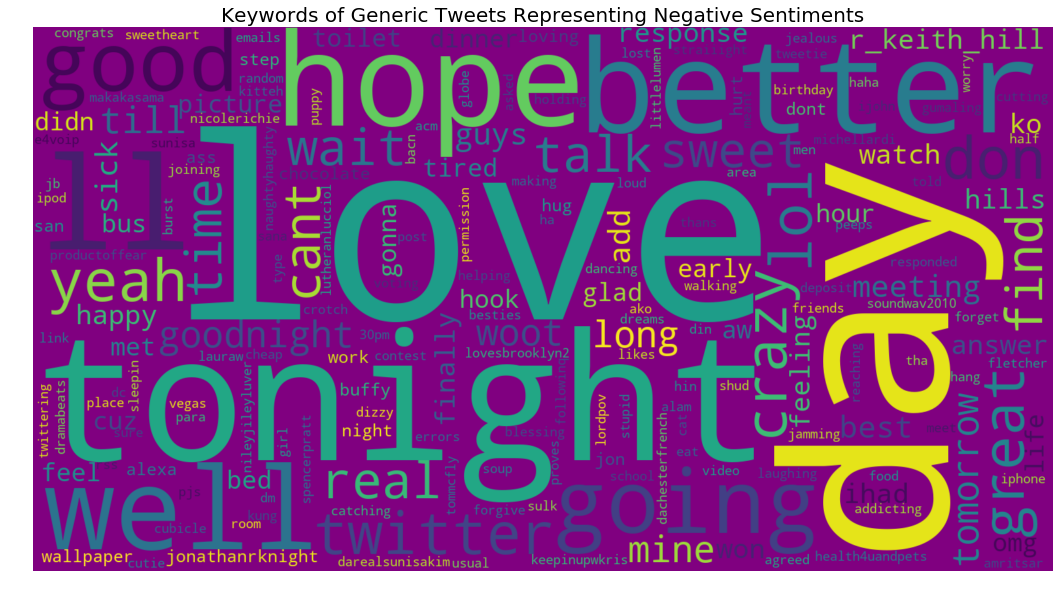

In [97]:
wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='purple',  
                min_font_size = 10).generate(split_tweets(generic_negativetweet_list))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords of Generic Tweets Representing Negative Sentiments',size=20)
plt.axis("off")
plt.show()

### Word Cloud for Tweets representing Positive sentiments

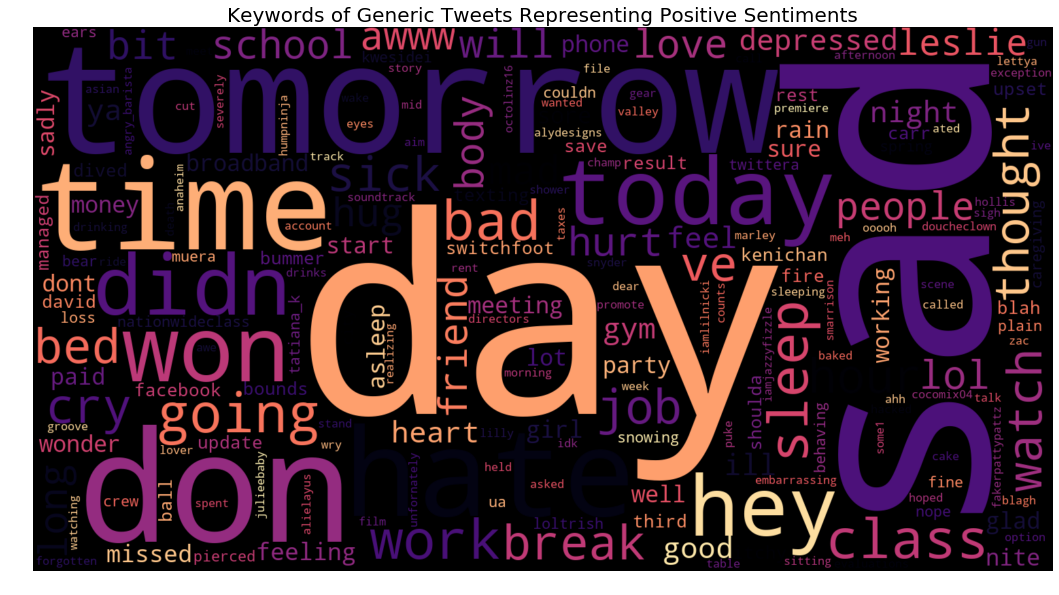

In [98]:

wordcloud = WordCloud(width = 1500, height = 800, 
               colormap='magma',  
                min_font_size = 10).generate(split_tweets(generic_positivetweet_list))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords of Generic Tweets Representing Positive Sentiments',size=20)
plt.axis("off")
plt.show()

## Model Preparation

Prepared the
data using two different types of features, Bag of words (word
frequency) and TF-IDF. Further Implemented multiple classification algorithms (logistic regression, k-NN, Naive Bayes,
SVM, decision trees, ensembles (RF, XGBoost)) , where each tweet is considered a single
observation/example..

### Count Vectorizer (Bag Of Words)
### Using  scores of words  and respective from Corpus list

Definition- 

The bag-of-words model is a way of representing text data when modeling text with machine learning algorithms.
The bag-of-words model is simple to understand and implement and has seen great success in problems such as language modeling and document classification.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

A vocabulary of known words.
A measure of the presence of known words.
It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

Cons-

Vocabulary: The vocabulary requires careful design, most specifically in order to manage the size, which impacts the sparsity of the document representations.

Sparsity: Sparse representations are harder to model both for computational reasons (space and time complexity) and also for information reasons, where the challenge is for the models to harness so little information in such a large representational space.



In [38]:
# in this assignment, words in corpus.txt will be used as features, and 
# term frequency for each word will be used as 1st part feature value

# load corpus info
corpus_pd = pd.read_csv("corpus.txt", sep='\t',header=None)
corpus_pd.columns = ["word", "score"]

In [39]:
corpus_pd.head()

,word,score
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [40]:
corpus_word_list = corpus_pd["word"].tolist()
corpus_score_list = corpus_pd["score"].tolist()


In [42]:
# initiating count vectorizer for each word in corpus word
matrix_term_frequency_cv = CountVectorizer(analyzer = "word", vocabulary=corpus_word_list)

In [43]:
# getting term_frequency matrix for generic tweets
generic_term_frequency = matrix_term_frequency_cv.fit_transform(tweets["text"])

In [44]:
generic_term_frequency

<200000x2477 sparse matrix of type '<class 'numpy.int64'>'
	with 191601 stored elements in Compressed Sparse Row format>

In [45]:
features=pd.DataFrame(generic_term_frequency.toarray())

In [46]:
features.columns=(corpus_word_list)
features.head()


,abandon,abandoned,abandons,abducted,abduction,abductions,abhor,abhorred,abhorrent,abhors,...,yeah,yearning,yeees,yes,youthful,yucky,yummy,zealot,zealots,zealous
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###  Assigned respective sentiments score for all the features against all the rows

In [47]:
for i in range(2477):
    features[features.columns[i]]=features[features.columns[i]]*corpus_score_list[i]

In [48]:
features["abandon"].value_counts()

 0    199989
-2        11
Name: abandon, dtype: int64

### I have tried to implement some models using corpus but since corpus had 2477 words
so model was taking huge time to run. Hence, i reduced the features to 500 using normal words of the tweets

### Bag of words with N-gram using words present in the tweets 

In [39]:
cv_vectorizer_all = CountVectorizer(analyzer = "word",ngram_range=(1,1),max_features=500,max_df=0.5)
cv_features = cv_vectorizer_all.fit_transform(tweets["text"])
cv_features

<200000x500 sparse matrix of type '<class 'numpy.int64'>'
	with 525238 stored elements in Compressed Sparse Row format>

In [40]:
X=cv_features
y=tweets["class"]
# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Trying All the Multiple Classification Algorithms using Bag of Words

### Logistic Regression

Logistic Regression-

Image result for logistic regressiontowardsdatascience.com
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

Pros

1-low variance

2-provides probabilities for outcomes

3-works well with diagonal (feature) decision boundaries

Cons-

1-high bias

In [31]:
clf = LogisticRegression(C=1).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

In [33]:
# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.7013642857142857
Test accuracy: 0.6955666666666667


### KNN

K- Nearest Neighbors or also known as K-NN belong to the family of supervised machine learning algorithms which means we use labeled (Target Variable) dataset to predict the class of new data point.

Pros-

1- K-NN is pretty intuitive and simple: K-NN algorithm is very simple to understand and equally easy to implement. To classify the new data point K-NN algorithm reads through whole dataset to find out K nearest neighbors.

2- Very easy to implement for multi-class problem: Most of the classifier algorithms are easy to implement for binary problems and needs effort to implement for multi class whereas K-NN adjust to multi class without any extra efforts.

3-Can be used both for Classification and Regression: One of the biggest advantages of K-NN is that K-NN can be used both for classification and regression problems.

Cons-

1- K-NN slow algorithm: K-NN might be very easy to implement but as dataset grows efficiency or speed of algorithm declines very fast.

2-Optimal number of neighbors: One of the biggest issues with K-NN is to choose the optimal number of neighbors to be consider while classifying the new data entry.

3-Outlier sensitivity: K-NN algorithm is very sensitive to outliers as it simply chose the neighbors based on distance criteria.




In [50]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

# predict on train and test set
y_train_predict_knn = clf.predict(X_train)
y_test_predict_knn = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy_knn = accuracy_score(y_train, y_train_predict_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_predict_knn)

# report results
print("Train accuracy knn: {}".format(train_accuracy_knn))
print("Test accuracy knn: {}".format(test_accuracy_knn))

Train accuracy knn: 0.7013642857142857
Test accuracy knn: 0.6955666666666667


### Naive Bayes

Naive Bayes

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set.

There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter.

A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

Pros

1-Computationally fast

2-Simple to implement

3-Works well with high dimensions


Cons

1-Relies on independence assumption and will perform badly if this assumption is not met

In [33]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train.toarray(), y_train)

# predict on train and test set
y_train_predict_NB = clf_NB.predict(X_train.toarray())
y_test_predict_NB = clf_NB.predict(X_test.toarray())

# calculate train and test accuracy
train_accuracy_NB = accuracy_score(y_train, y_train_predict_NB)
test_accuracy_NB = accuracy_score(y_test, y_test_predict_NB)

# report results
print("Train accuracy NB: {}".format(train_accuracy_NB))
print("Test accuracy NB: {}".format(test_accuracy_NB))

Train accuracy NB: 0.6757
Test accuracy NB: 0.6712333333333333


### Decision Trees

Decision Trees-
A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements



Pros-

1-easy to interpret visually when the trees only contain several levels

2-Can easily handle qualitative (categorical) features

3-Works well with decision boundaries parellel to the feature axis

Cons-

1-prone to overfitting

2-possible issues with diagonal decision boundaries

In [52]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

# predict on train and test set
y_train_predict_tree = clf_tree.predict(X_train)
y_test_predict_tree = clf_tree.predict(X_test)

# calculate train and test accuracy
train_accuracy_tree = accuracy_score(y_train, y_train_predict_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_predict_tree)

# report results
print("Train accuracy Decision Tree: {}".format(train_accuracy_tree))
print("Test accuracy Decision Tree: {}".format(test_accuracy_tree))

Train accuracy Decision Tree: 0.8643714285714286
Test accuracy Decision Tree: 0.64625


### SVM

SVM-A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. 
In other words, given labeled training data (supervised learning), 
the algorithm outputs an optimal hyperplane which categorizes new examples.

Pros

1-Performs similarly to logistic regression when linear separation

2-Performs well with non-linear boundary depending on the kernel used

3-Handle high dimensional data well

Cons

1-Susceptible to overfitting/training issues depending on kernel

In [ ]:
from sklearn import svm
clf_svm = svm.SVC(gamma='scale')
clf_svm.fit(X, y) 

# predict on train and test set
y_train_predict_svm = clf_svm.predict(X_train)
y_test_predict_svm = clf_svm.predict(X_test)

# calculate train and test accuracy
train_accuracy_svm = accuracy_score(y_train, y_train_predict_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_predict_svm)

# report results
print("Train accuracy SVM: {}".format(train_accuracy_svm))
print("Test accuracy SVM: {}".format(test_accuracy_svm))

After running it yields an accuracy of 56% on test set.
It takes 4hrs to run

### Random Forest

Random Forest-
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set



Pros

1-Decorrelates trees (relative to bagged trees)

2-important when dealing with mulitple features which may be correlated

3-reduced variance (relative to regular trees)

Cons

1-Not as easy to visually interpret


In [34]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_RF.fit(X_train, y_train) 

# predict on train and test set
y_train_predict_RF = clf_RF.predict(X_train)
y_test_predict_RF = clf_RF.predict(X_test)

# calculate train and test accuracy
train_accuracy_RF = accuracy_score(y_train, y_train_predict_RF)
test_accuracy_RF = accuracy_score(y_test, y_test_predict_RF)

# report results
print("Train accuracy RF: {}".format(train_accuracy_RF))
print("Test accuracy RF: {}".format(test_accuracy_RF))

Train accuracy RF: 0.6105928571428572
Test accuracy RF: 0.6061


### XGBoost

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.

In [35]:
!pip install xgboost
import xgboost as xgb
#data_dmatrix = xgb.DMatrix(data=X,label=y)

xg_reg = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#print(X_train)
xg_reg.fit(X_train,y_train)


# predict on train and test set
y_train_predict_XG = xg_reg.predict(X_train)
y_test_predict_XG = xg_reg.predict(X_test)

# calculate train and test accuracy
train_accuracy_XG = accuracy_score(y_train, y_train_predict_XG)
test_accuracy_XG = accuracy_score(y_test, y_test_predict_XG)

# report results
print("Train accuracy XG: {}".format(train_accuracy_XG))
print("Test accuracy XG: {}".format(test_accuracy_XG))

Train accuracy XG: 0.7157214285714286
Test accuracy XG: 0.6996166666666667


## TF-IDF

tf-idf stands for Term frequency-inverse document frequency. The tf-idf weight is a weight often used in information retrieval and text mining. 

Variations of the tf-idf weighting scheme are often used by search engines in scoring and ranking a document’s relevance given a query. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. 

The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus (data-set).

### TFIDF Using Corpus Words and score

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

## vectorized all the words based upon the word list and score given in the corpus text document
vectorizer = TfidfVectorizer(analyzer = "word", vocabulary=corpus_word_list)
tf_idf = vectorizer.fit_transform(tweets["text"])

features_tfidf=pd.DataFrame(tf_idf.toarray(),columns=corpus_word_list)

## assigning the scores of the corpus words to my tfidf features
for i in range(2477):
    features_tfidf[features_tfidf.columns[i]]=features_tfidf[features_tfidf.columns[i]]*corpus_score_list[i]
    
features_tfidf.head()

,abandon,abandoned,abandons,abducted,abduction,abductions,abhor,abhorred,abhorrent,abhors,...,yeah,yearning,yeees,yes,youthful,yucky,yummy,zealot,zealots,zealous
0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
3,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
4,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0


### TFIDF Using All words in Tweets



In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_all = TfidfVectorizer(analyzer = "word",ngram_range=(1,1),max_features=500,max_df=0.5)
tf_idf_all = vectorizer_all.fit_transform(tweets["text"])
tf_idf_all


<200000x500 sparse matrix of type '<class 'numpy.float64'>'
	with 525238 stored elements in Compressed Sparse Row format>

 I tried to implement the corpus and it gave very good scores on the canadian elections test set but for many model it was taking long time to run. Hence the reduced down to the words present in the tweets.

### Splitting Train and Test for Generic Tweets

In [31]:
X=tf_idf_all
y=tweets["class"]
# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Trying All the Multiple Classification Algorithms using TF-IDF

### Implementing Logistic Regression

In [74]:
clf = LogisticRegression(C=1000).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

In [76]:
# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.7021571428571428
Test accuracy: 0.69605


## Bonus
### Displaying Results of Model Visually

### For Generic TWEETS

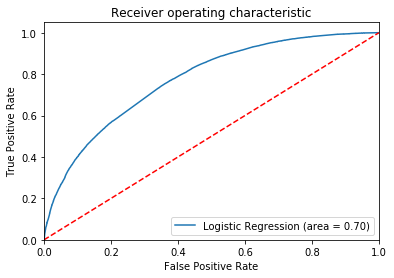

In [42]:
from sklearn.metrics import roc_curve, auc
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1],pos_label=4)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## BONUS 

### Improve the performance of your model by tuning its hyperparameters.
#### Hyper-parameter Tunning For Logistic Regression

In [77]:
def hyperparameter(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # c to control penalizing large weight on loss function
    for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        
        # train a logistic regression classifier
        clf = LogisticRegression(C=param).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        
        # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

In [78]:
param_df = hyperparameter(X,y)


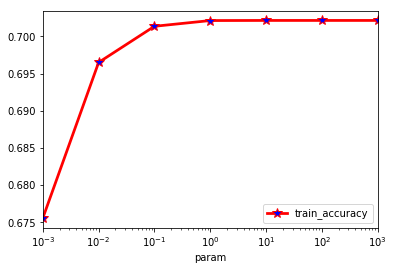

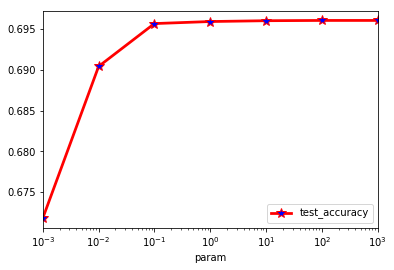

In [80]:

param_df.plot(x="param", y=["train_accuracy"], logx=True,color='r', linewidth=2.75, linestyle='-', marker='*', markersize=10,markerfacecolor='blue',
        markeredgecolor='r',
         markeredgewidth=1,)
param_df.plot(x="param", y=["test_accuracy"], logx=True,color='r', linewidth=2.75, linestyle='-', marker='*', markersize=10,markerfacecolor='blue',
        markeredgecolor='r',
         markeredgewidth=1,)





### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

# predict on train and test set
y_train_predict_knn = clf_knn.predict(X_train)
y_test_predict_knn = clf_knn.predict(X_test)

# calculate train and test accuracy
train_accuracy_knn = accuracy_score(y_train, y_train_predict_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_predict_knn)

# report results
print("Train accuracy knn: {}".format(train_accuracy_knn))
print("Test accuracy knn: {}".format(test_accuracy_knn))

Train accuracy knn: 0.70185
Test accuracy knn: 0.6543333333333333


### Multinomial Naive Baiyes

In [30]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train.toarray(), y_train)

# predict on train and test set
y_train_predict_NB = clf_NB.predict(X_train.toarray())
y_test_predict_NB = clf_NB.predict(X_test.toarray())

# calculate train and test accuracy
train_accuracy_NB = accuracy_score(y_train, y_train_predict_NB)
test_accuracy_NB = accuracy_score(y_test, y_test_predict_NB)

# report results
print("Train accuracy NB: {}".format(train_accuracy_NB))
print("Test accuracy NB: {}".format(test_accuracy_NB))

Train accuracy NB: 0.6818
Test accuracy NB: 0.67815


### Decision Trees

In [46]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

# predict on train and test set
y_train_predict_tree = clf_tree.predict(X_train)
y_test_predict_tree = clf_tree.predict(X_test)

# calculate train and test accuracy
train_accuracy_tree = accuracy_score(y_train, y_train_predict_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_predict_tree)

# report results
print("Train accuracy Decision Tree: {}".format(train_accuracy_tree))
print("Test accuracy Decision Tree: {}".format(test_accuracy_tree))

Train accuracy Decision Tree: 0.8636142857142857
Test accuracy Decision Tree: 0.6508


### SVM

In [ ]:
from sklearn import svm
clf_svm = svm.SVC(gamma='scale')
clf_svm.fit(X, y) 

# predict on train and test set
y_train_predict_svm = clf_svm.predict(X_train)
y_test_predict_svm = clf_svm.predict(X_test)

# calculate train and test accuracy
train_accuracy_svm = accuracy_score(y_train, y_train_predict_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_predict_svm)

# report results
print("Train accuracy SVM: {}".format(train_accuracy_svm))
print("Test accuracy SVM: {}".format(test_accuracy_svm))

After running it yields an accuracy of 58% on test set.
It takes 4hrs to run

### Ensemble- Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_RF.fit(X_train, y_train) 

# predict on train and test set
y_train_predict_RF = clf_RF.predict(X_train)
y_test_predict_RF = clf_RF.predict(X_test)

# calculate train and test accuracy
train_accuracy_RF = accuracy_score(y_train, y_train_predict_RF)
test_accuracy_RF = accuracy_score(y_test, y_test_predict_RF)

# report results
print("Train accuracy RF: {}".format(train_accuracy_RF))
print("Test accuracy RF: {}".format(test_accuracy_RF))

Train accuracy RF: 0.6152357142857143
Test accuracy RF: 0.6094833333333334


### XGBoost

In [49]:
!pip install xgboost
import xgboost as xgb
#data_dmatrix = xgb.DMatrix(data=X,label=y)

xg_reg = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#print(X_train)
xg_reg.fit(X_train,y_train)


# predict on train and test set
y_train_predict_XG = xg_reg.predict(X_train)
y_test_predict_XG = xg_reg.predict(X_test)

# calculate train and test accuracy
train_accuracy_XG = accuracy_score(y_train, y_train_predict_XG)
test_accuracy_XG = accuracy_score(y_test, y_test_predict_XG)

# report results
print("Train accuracy XG: {}".format(train_accuracy_XG))
print("Test accuracy XG: {}".format(test_accuracy_XG))

Train accuracy XG: 0.72575
Test accuracy XG: 0.6970333333333333


## MODEL IMPLEMENTATION

### Tested with TF-IDF Feature Vectorization
Since, TF-IDF vectorization came out to be slightly better than the bag of words techniques. Hence i tested all the model on the candian elections dataset using all the model with features as tf-idf vectors.

### Implementing this model on Canadian Elections Data 2019

In [34]:
canadian
# encoding positive and negative classes
dict={"sentiment":{"negative":0,"positive":4}}
canadian.replace(dict,inplace=True)
canadian.head()



,sentiment,negative_reason,text,party names
0,0,Women Reproductive right and Racism,rosiebarton suggestion agree canadian women tr...,Conservative
1,4,NaN,allwomanspacewalk real space_station etobicoke...,Other
2,0,Economy,brantford going cost 94 billion 4 years justin...,Liberal
3,4,NaN,canada canadaelection2019 canadavotes elxn43 n...,Other
4,0,Economy,canada taxpayers sick tired hard earned donate...,Liberal


### I am using here the corpus words with their scores and using the TF-IDF vectorizer as used previously
### beacuse tfidf works better than than  bag of words for generic case.

In [42]:
canadian.head()
#cleaning the whole text column by calling the text function
canadian["text"]=canadian["text"].apply(lambda x: data_clean(str(x)))

# getting term_frequency matrix for canadian _elections
#elections_term_frequency = vectorizer.transform(canadian["text"])


elections_features=pd.DataFrame(elections_term_frequency.toarray())
#elections_features.columns=corpus_word_list

#for i in range(2477):
    elections_features[elections_features.columns[i]]=elections_features[elections_features.columns[i]]*corpus_score_list[i]

#elections_features.head()

,0,1,2,3,4,5,6,7,8,9,...,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476
0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
3,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
4,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0


### Tranform all the text in canadian election using the same vectorizer transformer as used above  for the generic tweets.

In [36]:
canadian["text"]=canadian["text"].apply(lambda x: data_clean(str(x)))
elections_features=vectorizer_all.transform(canadian["text"])

## Testing With All the Models
### 1- Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function.

Pros:
1. There is no homogeneity of variance assumption.
2. Computation time is short.

Cons:
1. Easy to overfit the model.
2. Logistic regression attempts to predict outcomes based on a set of independent variables.

In [37]:
elections_predict=clf.predict(elections_features)
print("Accuracy",100*accuracy_score(canadian["sentiment"].tolist(),elections_predict))
#print(classification_report(canadian["sentiment"].tolist(),elections_predict))
prediction_list=elections_predict.tolist()
prediction_list

Accuracy 55.32114392873887


[4,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 4,
 0,
 4,
 0,
 4,
 4,
 0,
 0,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 0,
 0,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 0,
 4,
 4,
 0,
 0,
 4,
 0,
 4,
 4,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 4,
 0,
 0,
 0,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 0,
 4,
 4,
 0,
 4,
 4,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 0,
 0,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 0,
 4,
 4,
 0,


In [38]:
print(classification_report(canadian["sentiment"].tolist(),elections_predict))

              precision    recall  f1-score   support

           0       0.53      0.41      0.47      1006
           4       0.56      0.68      0.62      1127

   micro avg       0.55      0.55      0.55      2133
   macro avg       0.55      0.55      0.54      2133
weighted avg       0.55      0.55      0.55      2133



## BONUS
### Displaying Model Results Visually
#### ROC CURVE

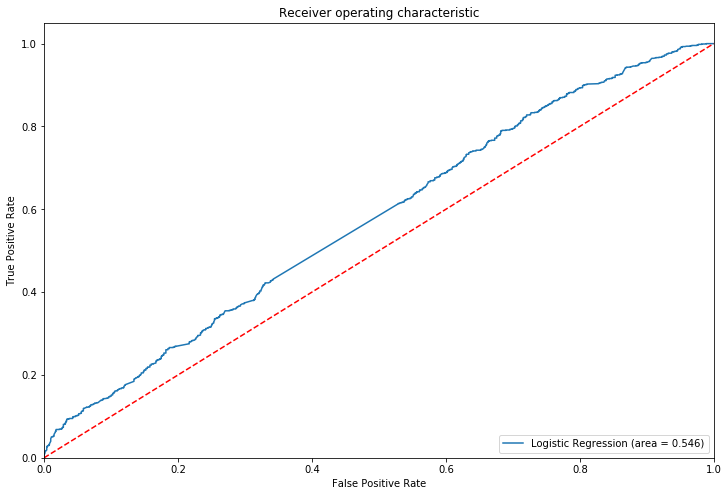

In [39]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(12,8))
logit_roc_auc = roc_auc_score(canadian["sentiment"].tolist(), clf.predict(elections_features))
fpr, tpr, thresholds = roc_curve(canadian["sentiment"].tolist(), clf.predict_proba(elections_features)[:,1],pos_label=4)

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Confusion Matrix

Text(69.0, 0.5, 'Actual')

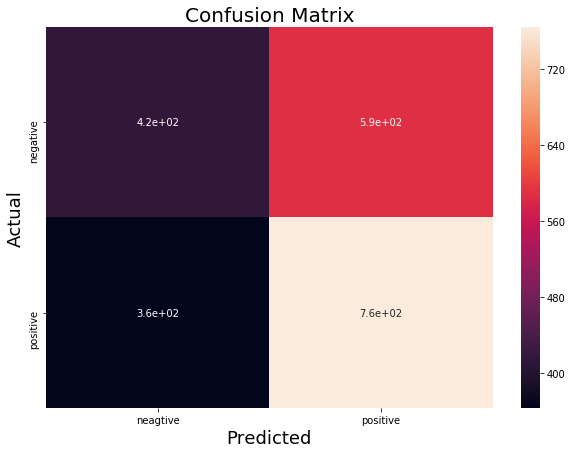

In [40]:
from sklearn.metrics import confusion_matrix
conf=pd.DataFrame(confusion_matrix(canadian["sentiment"].tolist(), 
                                  elections_predict),index=["negative","positive"],columns=["neagtive","positive"])
import seaborn as sb
plt.figure(figsize = (10,7))
sb.heatmap(conf, annot=True)
plt.title("Confusion Matrix",size=20)
plt.xlabel("Predicted",size=18)
plt.ylabel("Actual",size=18)

### 2- KNN

In [45]:
elections_predict=clf_knn.predict(elections_features)
print("Accuracy",100*accuracy_score(canadian["sentiment"].tolist(),elections_predict))
print(classification_report(canadian["sentiment"].tolist(),elections_predict))

Accuracy 53.35208626347867
              precision    recall  f1-score   support

           0       0.51      0.47      0.49      1006
           4       0.56      0.59      0.57      1127

   micro avg       0.53      0.53      0.53      2133
   macro avg       0.53      0.53      0.53      2133
weighted avg       0.53      0.53      0.53      2133



## BONUS
### Displaying Model Results Visually
#### ROC CURVE and Confusion Matrix

In [ ]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(12,8))
knn_roc_auc = roc_auc_score(canadian["sentiment"].tolist(), clf_knn.predict(elections_features))
fpr, tpr, thresholds = roc_curve(canadian["sentiment"].tolist(), clf_knn.predict_proba(elections_features)[:,1],pos_label=4)

plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
conf=pd.DataFrame(confusion_matrix(canadian["sentiment"].tolist(), 
                                  elections_predict),index=["negative","positive"],columns=["neagtive","positive"])
import seaborn as sb
plt.figure(figsize = (10,7))
sb.heatmap(conf, annot=True)
plt.title("Confusion Matrix",size=20)
plt.xlabel("Predicted",size=18)
plt.ylabel("Actual",size=18)

### 3- XGBoost

In [51]:
elections_predict=xg_reg.predict(elections_features.toarray())
print("Accuracy",100*accuracy_score(canadian["sentiment"].tolist(),elections_predict))
#print(classification_report(canadian["sentiment"].tolist(),elections_predict))

Accuracy 47.163619315518055


### 4- Multinomial Bayes

In [43]:
elections_predict=clf_NB.predict(elections_features.toarray())
print("Accuracy",100*accuracy_score(canadian["sentiment"].tolist(),elections_predict))
#print(classification_report(canadian["sentiment"].tolist(),elections_predict))

Accuracy 53.867791842475384


### 5-  Random Forest

In [45]:
elections_predict=clf_RF.predict(elections_features.toarray())
print("Accuracy",100*accuracy_score(canadian["sentiment"].tolist(),elections_predict))
#print(classification_report(canadian["sentiment"].tolist(),elections_predict))

Accuracy 50.86732301922176


### 6- Decision Trees

In [48]:
elections_predict=clf_tree.predict(elections_features.toarray())
print("Accuracy",100*accuracy_score(canadian["sentiment"].tolist(),elections_predict))
#print(classification_report(canadian["sentiment"].tolist(),elections_predict))

Accuracy 53.30520393811533


### 7- SVM

In [ ]:
elections_predict=clf_svm.predict(elections_features.to_numpy())
print("Accuracy",100*accuracy_score(canadian["sentiment"].tolist(),elections_predict))
#print(classification_report(canadian["sentiment"].tolist(),elections_predict))

After running it yields an accuracy of 51% on elections set.
It takes 4hrs to run

## Visualize the sentiment prediction results

#### Bar plot for Positive and Negative Predictions

In [44]:
def prediction_plot(listofpredictions):
    positive=0
    negative=0
    for i in range(len(listofpredictions)):
        if listofpredictions[i]==4:
            positive=positive+1
        else:
            negative=negative+1
    y=[positive,negative]
    x=["positive","negative"]
    plt.figure(figsize=(6,5))
    
    
    plt.ylabel("Count",size=18)
    plt.xlabel("Sentiments",size=18)
    return sb.barplot(x,y)
     

Text(0.5, 1.0, 'Distribution in Predicted Tweets')

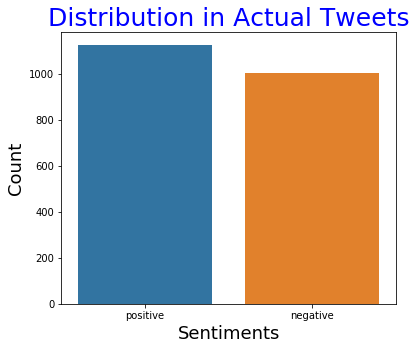

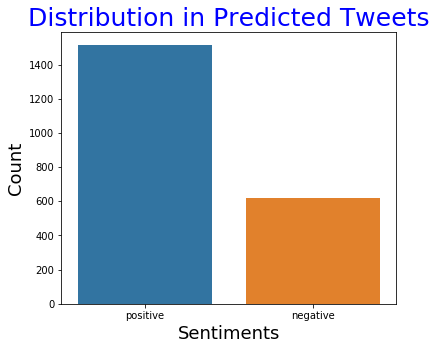

In [45]:
prediction_plot(canadian["sentiment"].tolist())
plt.title("Distribution in Actual Tweets",size=25,color="blue")
prediction_plot(prediction_list)
plt.title("Distribution in Predicted Tweets",size=25,color="blue")

####  True sentiment for each of the 3 parties

In [46]:
## Actual True sentiment for parties
def true_sent_real (partyname):
    actual_true=partyname[partyname["sentiment"]==4]
    print(actual_true.shape)
    array=[]

    for i in range(actual_true.shape[0]):
        array.append(4)

    real_indexes=actual_true.index
    return([real_indexes,array])

### Accuracy for predicting True Sentiment for liberals

In [ ]:
#liberal.head()

In [ ]:
#liberal.index

In [ ]:
#liberal=elections_predict[liberal.index]


In [ ]:
#np.sum(liberal)/4

In [ ]:
#len(liberal)-np.sum(liberal)/4

### Sentiment Prediction for Parties

For each parties this fuction calculates the number of positive nad negative predicted sentiments

In [47]:
## Sentiment prediction for parties
def sentiment_pred (partyname):
    partyname=elections_predict[partyname.index]
    
    positive=np.sum(partyname)/4
    negative=len(partyname)-np.sum(partyname)/4
    return([positive, negative])

In [48]:
sentiment_pred(liberal)

[356.0, 155.0]

In [50]:
sentiment_pred(conservative)

[239.0, 135.0]

In [51]:
sentiment_pred(ndp)

[95.0, 28.0]

In [52]:
sentiment_pred(others)

[825.0, 300.0]

In [54]:

true=[385,239,77,814]
nega=[168,135,19,296]
df=pd.DataFrame({"Positive Sentiments":true,"Negative Sentiments":nega},index=["Liberals","Conservatives","NDP","Others"])
df

,Positive Sentiments,Negative Sentiments
Liberals,385,168
Conservatives,239,135
NDP,77,19
Others,814,296


Text(0.5, 1.0, 'Predictited True Sentiments')

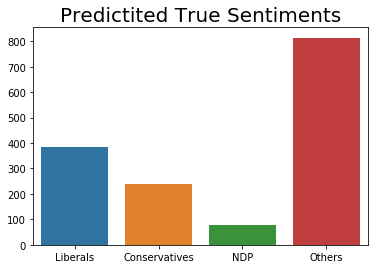

In [55]:
sb.barplot(df.index,df["Positive Sentiments"].tolist())
plt.title("Predictited True Sentiments",size=20)

### Predicted True sentiments vs labelled true sentiments

In [56]:
true_sent_real(liberal)[0],true_sent_real(conservative)[0],true_sent_real(ndp)[0],true_sent_real(others)[0]

(0, 4)
(0, 4)
(0, 4)
(0, 4)


(Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'))

Text(0, 0.5, 'Count')

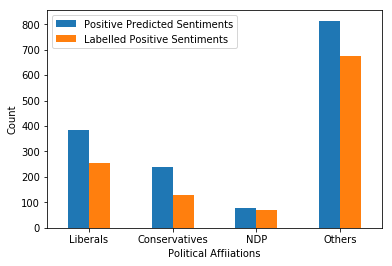

In [57]:
### Predicted true seniments vs actual true
true=[385,239,77,814]
a_true=[253,130,69,675]
df1=pd.DataFrame({"Positive Predicted Sentiments":true,"Labelled Positive Sentiments":a_true},index=["Liberals","Conservatives","NDP","Others"])
df1
df1.plot.bar(rot=0)
plt.xlabel("Political Affiiations")
plt.ylabel("Count")

### Positive and Negative Predicted Sentiments

Text(0, 0.5, 'Count')

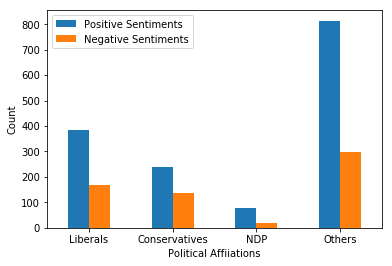

In [58]:
df.plot.bar(rot=0)
plt.xlabel("Political Affiiations")
plt.ylabel("Count")

## Analysis of Negative Tweets

In [63]:
negative_tweets=canadian[canadian["sentiment"]==0]
negative_tweets.head(50)

,sentiment,negative_reason,text,party names
0,0,Women Reproductive right and Racism,rosiebarton suggestion agree canadian women tr...,Conservative
2,0,Economy,brantford going cost 94 billion 4 years justin...,Liberal
4,0,Economy,canada taxpayers sick tired hard earned donate...,Liberal
5,0,Others,canadavotes2019 elxn43 cdnpoli facts blastfrom...,Conservative
8,0,Others,chooseforward cdnpoli elxn43 ncanada don t ame...,Other
9,0,Scandal,cpckinsellagate nlet receipts pays warren kins...,Liberal
14,0,Others,kinsella runs deep cpc lyingandy a crazed anti...,Liberal
15,0,Tell lies,lyingandy a history answering embarrassing que...,Other
19,0,Scandal,urgent watch video david haskell people party ...,Conservative
20,0,Others,policy comment illegal immoral nefarious activ...,Liberal


In [38]:
negative_tweets["negative_reason"].value_counts()

Others                                 364
Scandal                                270
Tell lies                              198
Economy                                 51
Women Reproductive right and Racism     45
Climate Problem                         41
Separation                              16
Privilege                               12
Healthcare                               5
Healthcare and Marijuana                 4
Name: negative_reason, dtype: int64

Healtcare and marijuana can be combined into 1 catogary healthcare.
Privelage and separation can also be combined into 1 category Racism
Tell lies and scandal and be combined into false means reason becaue both of them are false problems
since climate problems are very few so they can be clubed with other neagtive reasons


In [39]:

# encoding positive and negative classes
dict_negative={"negative_reason":{"Healthcare and Marijuana":"Healthcare",
                                  "Separation":"Racism","Privilege":"Racism","Women Reproductive right and Racism":"Racism",
                                  "Climate Problem":"Others","Tell lies":"False Means","Scandal":"False Means"}}

In [40]:
negative_tweets.replace(dict_negative,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [55]:
negative_tweets["negative_reason"].value_counts()

False Means    468
Others         405
Racism          73
Economy         51
Healthcare       9
Name: negative_reason, dtype: int64

For the case of neagtive reasons the tfidf vectorization using set of words from corpus is not yielding good results. Hence, i tried 
tfidf vectorization using N- Grams (1,2) for this case and seeting tha maximum number of features=1000. Also, setting the max document 
frequency to 0.5. Since the words with document frequency higher than 0.5 have to no use in sentiment analysis they might be the remaning stop words left.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_negative = TfidfVectorizer(analyzer = "word",ngram_range=(1,2),max_features=1000,max_df=0.5)

In [57]:
features_negative=vectorizer_negative.fit_transform(negative_tweets["text"])

In [58]:
X=features_negative
y=negative_tweets["negative_reason"]
# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Logistic Regression

In [59]:
log=LogisticRegression(C=1,multi_class="ovr")

In [60]:
log.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
y_pred=log.predict(X_test)
print("Test Accuracy",accuracy_score(y_test,y_pred))

Test Accuracy 0.5445544554455446


In [62]:
y_train_pred=log.predict(X_train)
print("Train Accuracy",accuracy_score(y_train,y_train_pred))

Train Accuracy 0.7690607734806629


In [53]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

     Economy       1.00      0.04      0.08        46
 False Means       0.76      0.93      0.84       423
  Healthcare       0.00      0.00      0.00         9
      Others       0.78      0.80      0.79       360
      Racism       0.92      0.18      0.30        67

   micro avg       0.77      0.77      0.77       905
   macro avg       0.69      0.39      0.40       905
weighted avg       0.78      0.77      0.73       905



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
y_pred=clf_knn.predict(X_test)
print("Test Accuracy",accuracy_score(y_test,y_pred))


Test Accuracy 0.504950495049505


In [115]:
y_train_pred=clf_knn.predict(X_train)
print("Train Accuracy",accuracy_score(y_train,y_train_pred))

Train Accuracy 0.5392265193370166


In [110]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

     Economy       0.75      0.07      0.12        46
 False Means       0.56      0.76      0.65       423
  Healthcare       0.00      0.00      0.00         9
      Others       0.48      0.42      0.45       360
      Racism       0.87      0.19      0.32        67

   micro avg       0.54      0.54      0.54       905
   macro avg       0.53      0.29      0.31       905
weighted avg       0.56      0.54      0.51       905



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_RF.fit(X_train, y_train) 

# predict on train and test set
y_train_predict_RF = clf_RF.predict(X_train)
y_test_predict_RF = clf_RF.predict(X_test)

# calculate train and test accuracy
train_accuracy_RF = accuracy_score(y_train, y_train_predict_RF)
test_accuracy_RF = accuracy_score(y_test, y_test_predict_RF)

# report results
print("Train accuracy RF: {}".format(train_accuracy_RF))
print("Test accuracy RF: {}".format(test_accuracy_RF))

print(classification_report(y_train,y_train_pred))

Train accuracy RF: 0.46740331491712706
Test accuracy RF: 0.44554455445544555
              precision    recall  f1-score   support

     Economy       0.75      0.07      0.12        46
 False Means       0.56      0.76      0.65       423
  Healthcare       0.00      0.00      0.00         9
      Others       0.48      0.42      0.45       360
      Racism       0.87      0.19      0.32        67

   micro avg       0.54      0.54      0.54       905
   macro avg       0.53      0.29      0.31       905
weighted avg       0.56      0.54      0.51       905



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Results

### Model 1

All the 7 machine learning models were trained on the generic tweets dataset.
Further all these 7 models were tested on the canadian elections 2019 dataset. 

Different models gave different performance on the
elections dataset.

All the models were implemented with using two sets of feature techniques- tf-idf vectorization and bag of words.
All the scores of all the models are displayed below in form of the table and graphical plot.




In [46]:
models=["Logistic","KNN","NB","RF","Decision Trees","SVM","XGBoost"]
scores_generic_tfidf=[70.2,65.43,67.8,60.9,65.36,58.2,69.7]
scores_generic_bagofwords=[69.55,69.55,67.123,60.1,64.6,56,69.96]
scores__elections_tfidf=[55.32,53.35,53.86,50.86,53.3,51,47.5]

Text(0.5, 0, 'Different Models')

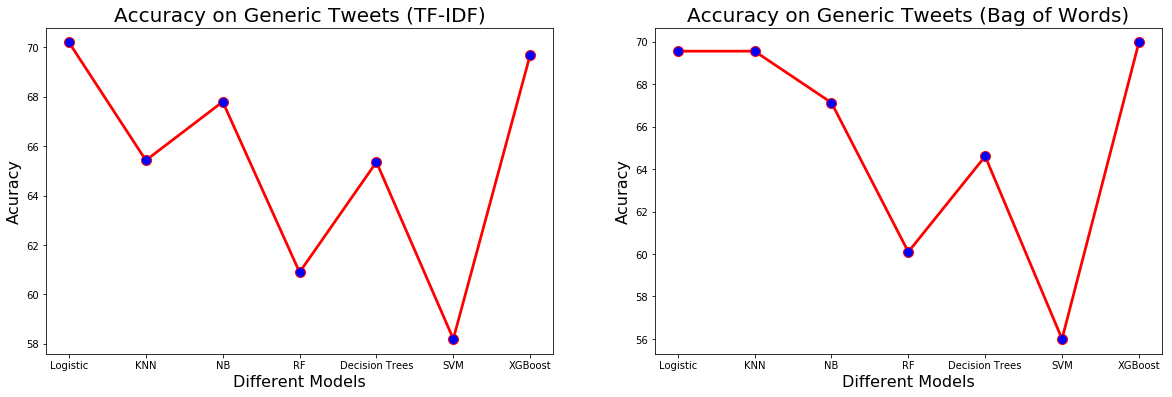

In [47]:

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(models,scores_generic_tfidf,color='red', linewidth=2.75, linestyle='-', marker='.', markersize=20,markerfacecolor='b',
        markeredgecolor='r',
         markeredgewidth=1,label="Accuracy")
plt.title("Accuracy on Generic Tweets (TF-IDF)",size=20)
plt.ylabel("Acuracy",size=16)
plt.xlabel("Different Models",size=16)

plt.subplot(1,2,2)
plt.plot(models,scores_generic_bagofwords,color='red', linewidth=2.75, linestyle='-', marker='.', markersize=20,markerfacecolor='b',
        markeredgecolor='r',
         markeredgewidth=1,label="Accuracy")
plt.title("Accuracy on Generic Tweets (Bag of Words)",size=20)
plt.ylabel("Acuracy",size=16)
plt.xlabel("Different Models",size=16)



Text(0.5, 0, 'Different Models')

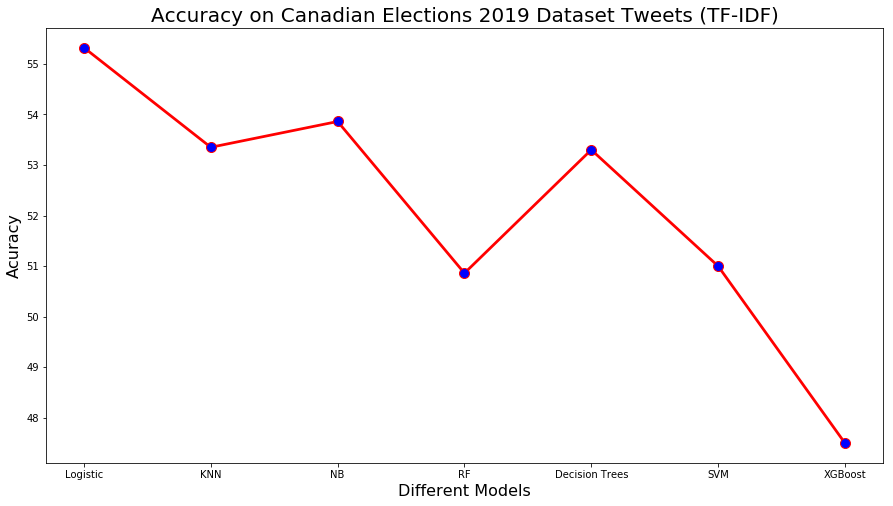

In [48]:
plt.figure(figsize=(15,8))
plt.plot(models,scores__elections_tfidf,color='red', linewidth=2.75, linestyle='-', marker='.', markersize=20,markerfacecolor='b',
        markeredgecolor='r',
         markeredgewidth=1,label="Accuracy")
plt.title("Accuracy on Canadian Elections 2019 Dataset Tweets (TF-IDF)",size=20)
plt.ylabel("Acuracy",size=16)
plt.xlabel("Different Models",size=16)

Based upon the above test results in form of graphical plot , the logistic regresion gave the best
results for prediction of sentiments. Hence, for the model 1, I choose logistic regression to be the best model.

Sentiment Prediction vs Reality-

1- When we see the visualization of predicted true sentiments based upon the political affiliation. 
We can see that the liberals had the most number of predicted true sentiments.
This indicates that NLP analytics is pretty useful for predicting the elections outcome.

2-When we see the visualization of predicted true sentiments compared to the 
actual true sentiments in labels based upon the political affiliation. 
We can see that the still  liberals had the most number of predicted true sentiments.
This indicates that NLP analytics is pretty useful for predicting the elections outcome.

3- When we compare on the basis of predicted true and negative sentiments over all the liberals had the highest ratio vs true and negative sentiments indicating that liberals should win
the elections.

4- According to the peoples view also liberals were always on the upper hand most of the peole has positive sentiments for liberals followed by conservatives.

5-Based Upon the NLP analytics the outcome of sentiment analysis quite resembled with the outcome of the Elections in 2019.



### Model 2

Analysis of Negative Reason-
 Healtcare and marijuana were combined into 1 catogary healthcare.
 Privelage and separation were also be combined into 1 category Racism
 Tell lies and scandal were combined into false means reason becaue both of them are false problems
 Since climate problems are very few so they can be clubed with other neagtive reasons


In [50]:
models=["Logistic Regression","KNN","RandomForest"]
scores_training=[76.9,53.9,46.7]
scores_test=[58.41,50.41,44.5]

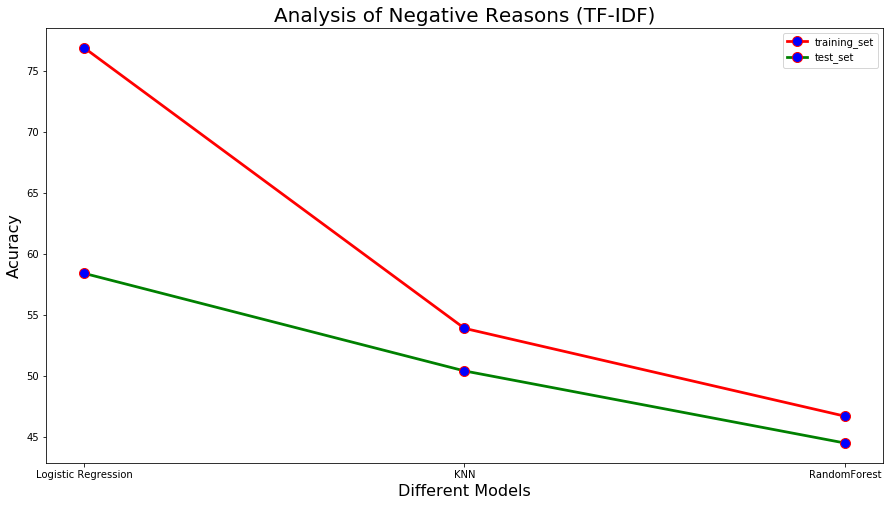

In [57]:
plt.figure(figsize=(15,8))
plt.plot(models,scores_training,color='red', linewidth=2.75, linestyle='-', marker='.', markersize=20,markerfacecolor='b',
        markeredgecolor='r',
         markeredgewidth=1,label="training_set")
plt.title("Analysis of Negative Reasons (TF-IDF)",size=20)
plt.ylabel("Acuracy",size=16)
plt.xlabel("Different Models",size=16)
plt.plot(models,scores_test,color='green', linewidth=2.75, linestyle='-', marker='.', markersize=20,markerfacecolor='b',
        markeredgecolor='r',
         markeredgewidth=1,label="test_set")
plt.legend()

In [54]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

     Economy       1.00      0.04      0.08        46
 False Means       0.76      0.93      0.84       423
  Healthcare       0.00      0.00      0.00         9
      Others       0.78      0.80      0.79       360
      Racism       0.92      0.18      0.30        67

   micro avg       0.77      0.77      0.77       905
   macro avg       0.69      0.39      0.40       905
weighted avg       0.78      0.77      0.73       905



We can see the precision for the economy class is pretty well beacause the tweets related to economy as a negative reason mostly have words like billion million which the model is able to learn.Also for the racism case tweets have words related to

But for the case of healtcare the number of examples are pretty less only 9 out of 1000 examples. And after that also we are splitting it so training set may be only 2 to 3 examples to learn for health are. Which is very very difficult fot the machine learning model to be able to learn.

For analysis of negative reasons I used three machine learning models- logistic regression, KNN and Random forest.

Out of them Logistic regression performed best of training and test set giving a score of 58% on test set which is reasonably good.


### Improving Accuracy for both the models

1-Hyperparameter Tuning– Grid Search 
I can do grid search for tuning by taking permutation combinations for more parameters- for more parameters-C,Solver,Penalty,   max_iterations, Multiclass  solver.

2- PCA- 
We could also go for a Principal Component Analysis which can help in dimensionality reduction, hence appropriate feature selection leading to increse in accuracy of the model.

3-Error Analysis-
For each of my models, going  back and looking at the cases where they are failing. I might end up finding that some of my models work well on one part of the parameter space while others work better on other parts.

4-While doing this hyperparameter tuning i can incraese the number of cross-validation folds to 20 with these 4 sets of parameters with 4 loops.
But of this computation time can go upto 3hrs.

    
    